In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# <font size=5 color='#217638'> Medical Costs Regression Analysis</font> 



## <span id="1"></span> ** 1. Overview **

Columns:
- **age: ** age of primary beneficiary 
- **sex: ** insurance contractor gender, female, male 
- **bmi: ** body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
- **children: ** number of children covered by health insurance / number of dependents
- **smoker: ** smoking
- **region: ** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges: ** individual medical costs billed by health insurance

## <span id="2"></span> ** 2. Importing Libraries and Reading the Dataset **

In [1]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# regression models
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.preprocessing import PolynomialFeatures # for adding polynomial features
from sklearn.linear_model import Ridge # for ridge regression
from sklearn.linear_model import Lasso # for lasso regression
from sklearn.svm import SVR # for support vector regression
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
# hyptertuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# extra
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\Sasmita\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv(r'C:\Users\Sasmita\Downloads\insurance.csv')
#dataset.head()

In [3]:
dataset.count()

In [4]:
dataset.describe()

## <span id="3"></span> ** 3. Data Visualization and Preprocessing **

In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

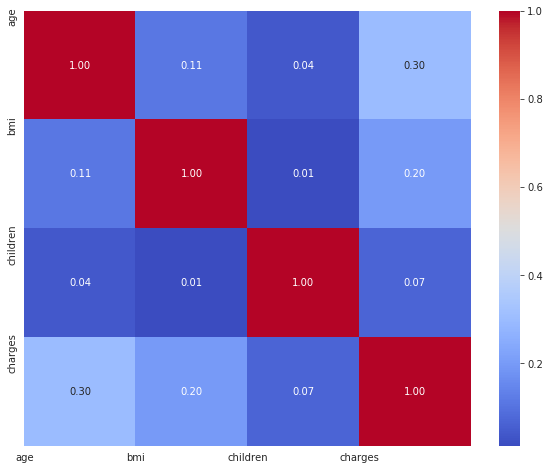

In [6]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

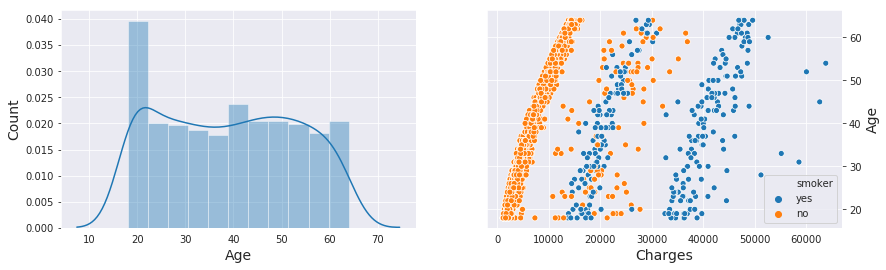

In [7]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['age'], ax = axes[0])
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'charges', y = 'age', data = dataset, hue = 'smoker', ax = axes[1])
axes[1].set_xlabel('Charges', fontsize=14)
axes[1].set_ylabel('Age', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

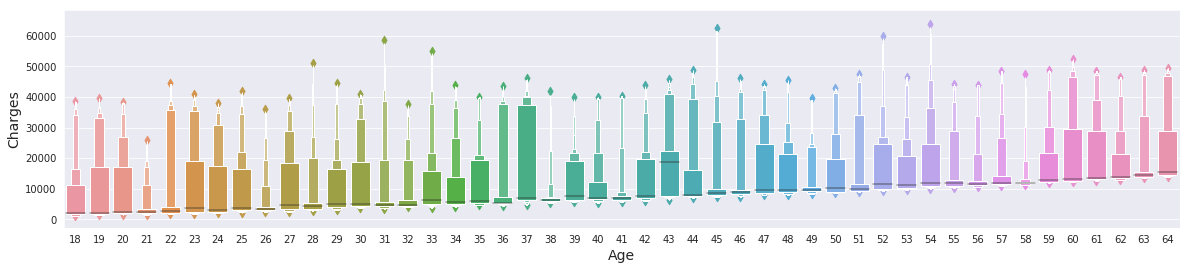

In [8]:
f, axe = plt.subplots(1,1,figsize=(20,4))
sns.boxenplot(x = 'age', y = 'charges', data = dataset, ax = axe)
axe.set_xlabel('Age', fontsize=14)
axe.set_ylabel('Charges', fontsize=14)
plt.show()

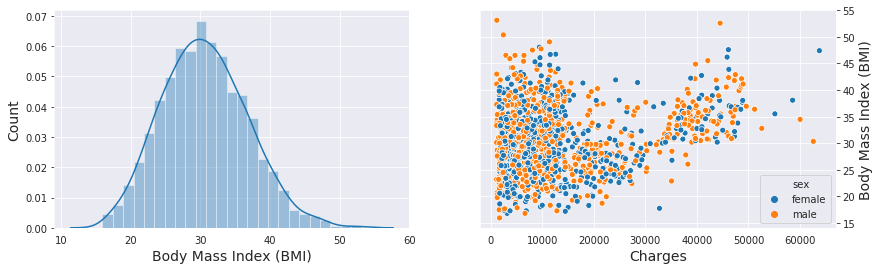

In [9]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['bmi'], ax = axes[0])
axes[0].set_xlabel('Body Mass Index (BMI)', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.scatterplot(x = 'charges', y = 'bmi', data = dataset, hue = 'sex',ax = axes[1])
axes[1].set_xlabel('Charges', fontsize=14)
axes[1].set_ylabel('Body Mass Index (BMI)', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

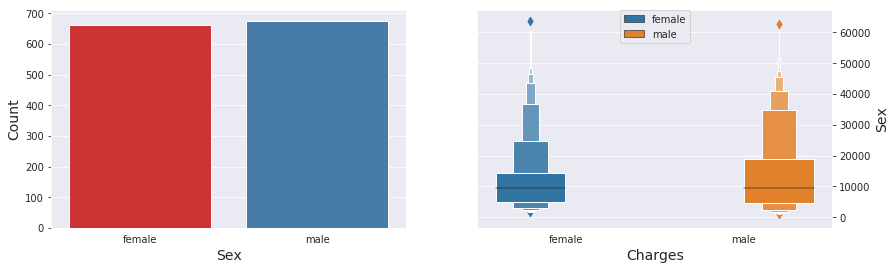

In [10]:
sex_list = Counter(dataset['sex'])
labels = sex_list.keys()
sizes = sex_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['sex'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Sex', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'sex', y = 'charges', data = dataset, hue = 'sex', ax = axes[1])
axes[1].set_xlabel('Charges', fontsize=14)
axes[1].set_ylabel('Sex', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(0.6,1), loc=1, borderaxespad=0.)

plt.show()

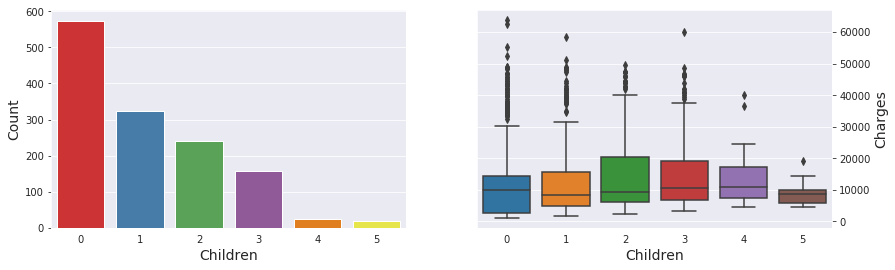

In [11]:
children_list = Counter(dataset['children'])
labels = children_list.keys()
sizes = children_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['children'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Children', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxplot(x = 'children', y = 'charges', data = dataset, ax = axes[1])
axes[1].set_xlabel('Children', fontsize=14)
axes[1].set_ylabel('Charges', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

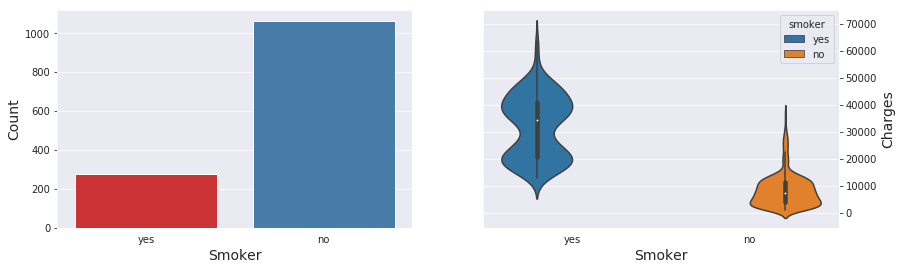

In [12]:
smoker_list = Counter(dataset['smoker'])
labels = smoker_list.keys()
sizes = smoker_list.values()

f, axes = plt.subplots(1,2,figsize=(14,4))

sns.countplot(dataset['smoker'], ax = axes[0], palette="Set1")
axes[0].set_xlabel('Smoker', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'smoker', y = 'charges', data = dataset, hue = 'smoker', ax = axes[1])
axes[1].set_xlabel('Smoker', fontsize=14)
axes[1].set_ylabel('Charges', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

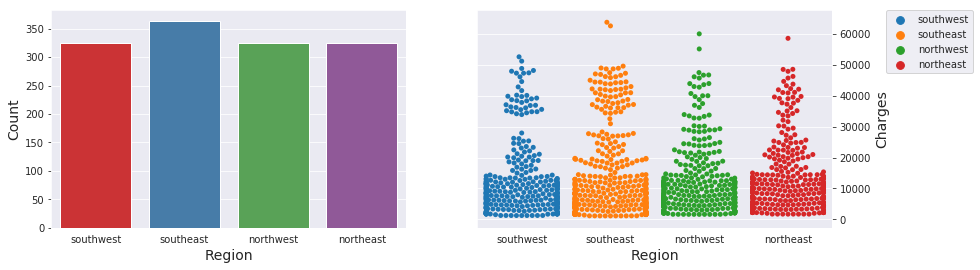

In [13]:
region_list = Counter(dataset['region'])
labels = region_list.keys()
sizes = region_list.values()




In [14]:
dataset = pd.get_dummies(dataset)

In [15]:
dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [16]:
X = dataset.drop('charges', axis = 1).values
y = dataset['charges'].values.reshape(-1,1)

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [18]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1003, 11)
Shape of X_test:  (335, 11)
Shape of y_train:  (1003, 1)
Shape of y_test (335, 1)


## <span id="4"></span> ** 4. Regression Models **

### <span id="5"></span> ** Linear Regression **

In [19]:
# Creating the linear regressor
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X, y = y, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7445006998667603
R2_score (train):  0.7449555328228536
R2_score (test):  0.7672642952734358
RMSE:  5926.023602394467


### <span id="6"></span> ** Polynomial Regression - 2nd degree **

In [1]:
# Creating the polynomial features and regressor
# poly_reg = PolynomialFeatures(degree = 2)
# X_poly = poly_reg.fit_transform(X)
# X_train_poly = poly_reg.fit_transform(X_train)
# poly_reg.fit(X_train_poly, y_train)

# regressor_poly2 = LinearRegression()
# regressor_poly2.fit(X_train_poly, y_train)

In [2]:
# # Predicting Cross Validation Score the Test set results
# cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_poly, y = y, cv = 10)

# # Predicting R2 Score the Train set results
# y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
# r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# # Predicting R2 Score the Test set results
# y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
# r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# # Predicting RMSE the Test set results
# rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
# print('CV: ', cv_poly2.mean())
# print('R2_score (train): ', r2_score_poly2_train)
# print('R2_score (test): ', r2_score_poly2_test)
# print("RMSE: ", rmse_poly2)

### <span id="7"></span> ** Ridge Regression **

In [23]:
# steps = [
#     ('scalar', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('model', Ridge())
# ]

# ridge_pipe = Pipeline(steps)

In [24]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:[200, 230, 250,265, 270, 275, 290, 300, 500] -> 200
# step 2: alpha:[10,50,100,150,200] -> 50
# step 3: alpha: np.arange(30, 75, 1) -> 43

# parameters =  {  'model__alpha' : [43],
#                  'model__fit_intercept' : [True],
#                  'model__tol' : [0.0001],
#                  'model__solver' : ['auto'],
#                 'model__random_state': [42] 
# }
# regressor_ridge = GridSearchCV(ridge_pipe, parameters, iid=False, cv=10)
# regressor_ridge = regressor_ridge.fit(X, y.ravel())

In [3]:
# print(regressor_ridge.best_score_)
# print(regressor_ridge.best_params_)

In [4]:
# # Predicting Cross Validation Score the Test set results
# cv_ridge = regressor_ridge.best_score_

# # Predicting R2 Score the Test set results
# y_pred_ridge_train = regressor_ridge.predict(X_train)
# r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# # Predicting R2 Score the Test set results
# y_pred_ridge_test = regressor_ridge.predict(X_test)
# r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# # Predicting RMSE the Test set results
# rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
# print('CV: ', cv_ridge.mean())
# print('R2_score (train): ', r2_score_ridge_train)
# print('R2_score (test): ', r2_score_ridge_test)
# print("RMSE: ", rmse_ridge)

### <span id="8"></span> ** Lasso Regression **

In [27]:
# steps = [
#     ('scalar', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('model', Lasso())
# ]

# lasso_pipe = Pipeline(steps)

In [5]:
# Applying Grid Search to find the best model and the best parameters
# step 1: alpha:np.arange(0.01, 1, 0.005) -> 0.9949

# parameters =  {  'model__alpha' : [0.9949],
#                  'model__fit_intercept' : [True],
#                  'model__tol' : [0.0001],
#                  'model__max_iter' : [5000],
#                 'model__random_state': [42] 
# }
# regressor_lasso = GridSearchCV(lasso_pipe, parameters, iid=False, cv=10, n_jobs = -1, verbose = 4)
# regressor_lasso = regressor_lasso.fit(X, y.ravel())

In [6]:
# # Predicting Cross Validation Score
# cv_lasso = regressor_lasso.best_score_

# # Predicting R2 Score the Test set results
# y_pred_lasso_train = regressor_lasso.predict(X_train)
# r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# # Predicting R2 Score the Test set results
# y_pred_lasso_test = regressor_lasso.predict(X_test)
# r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# # Predicting RMSE the Test set results
# rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
# print('CV: ', cv_lasso.mean())
# print('R2_score (train): ', r2_score_lasso_train)
# print('R2_score (test): ', r2_score_lasso_test)
# print("RMSE: ", rmse_lasso)

### <span id="9"></span> ** Support Vector Regression **

In [30]:
# Feature Scaling
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_scaled = sc_X.fit_transform(X)
# y_scaled = sc_y.fit_transform(y.reshape(-1,1))

In [31]:
# Creating the SVR regressor
# regressor_svr = SVR()

In [7]:
# Applying Grid Search to find the best model and the best parameters
# parameters =  { 'kernel' : ['rbf', 'sigmoid'],
#                  'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
#                  'tol' : [0.0001],
#                  'C': [0.001, 0.01, 0.1, 1, 10, 100] }
# regressor_svr = GridSearchCV(estimator = regressor_svr,
#                            param_grid = parameters,
#                            cv = 10,
#                            verbose = 4,
#                            iid = True,
#                            n_jobs = -1)
# regressor_svr = regressor_svr.fit(X_scaled, y_scaled.ravel())

In [8]:
# print(regressor_svr.best_params_)
# print(regressor_svr.best_score_)

In [9]:
# # Predicting Cross Validation Score
# cv_svr = regressor_svr.best_score_

# # Predicting R2 Score the Train set results
# y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)))
# r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# # Predicting R2 Score the Test set results
# y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)))
# r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# # Predicting RMSE the Test set results
# rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
# print('CV: ', cv_svr.mean())
# print('R2_score (train): ', r2_score_svr_train)
# print('R2_score (test): ', r2_score_svr_test)
# print("RMSE: ", rmse_svr)

### <span id="10"></span> ** Decision Tree Regression **

In [35]:
# Creating the Decision Tree regressor
regressor_dt = DecisionTreeRegressor(random_state = 42)

In [36]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "max_depth": np.arange(1,21),
              "min_samples_leaf": [1, 5, 10, 20, 50, 100],
              "min_samples_split": np.arange(2, 11),
              "criterion": ["mse"],
              "random_state" : [42]}
            ]
regressor_dt = GridSearchCV(estimator = regressor_dt,
                           param_grid  = parameters,
                           cv = 10,
                           verbose = 4,
                           iid = False,
                           n_jobs = -1)
regressor_dt = regressor_dt.fit(X_scaled, y_scaled)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 5432 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:   15.1s finished


In [37]:
print(regressor_dt.best_params_)
print(regressor_dt.best_score_)

{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}
0.8524782784394495


In [38]:
# Predicting Cross Validation Score
cv_dt = regressor_dt.best_score_

# Predicting R2 Score the Train set results
y_pred_dt_train = sc_y.inverse_transform(regressor_dt.predict(sc_X.transform(X_train)))
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = sc_y.inverse_transform(regressor_dt.predict(sc_X.transform(X_test)))
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8524782784394495
R2_score (train):  0.8776418101991081
R2_score (test):  0.8776557282375658
RMSE:  4296.587785971407


### <span id="11"></span> ** Random Forest Regression **

In [39]:
# Creating the Random Forest regressor
regressor_rf = RandomForestRegressor()

Because of RandomSearch and GridSeach have took about 20 minutes, I didn't include these steps in the kernel's final form. But you can expand the following 2 cells and view how changed the parameters.

In [40]:
RANDOM SEARCH - STEP 1 - TOOK 17.6 MINUTES
parameters =  { "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               "max_features": ["auto", "sqrt"],
               "max_depth": np.linspace(10, 110, num = 11),
               "min_samples_split": [2, 5, 10],
               "min_samples_leaf": [1, 2, 4],
               "bootstrap": [True, False],
               "criterion": ["mse"],
               "random_state" : [42] }
           
regressor_rf = RandomizedSearchCV(estimator = regressor_rf,
                                 param_distributions = parameters,
                                 #n_iter = 100,
                                 cv = 10,
                                 random_state=42
                                 )
regressor_rf = regressor_rf.fit(X_scaled, y.ravel())

Best Parameters and Score:
{'random_state': 42, 'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50.0, 'criterion': 'mse', 'bootstrap': True}
0.8541297253461337

In [41]:
# GRID SEARCH - STEP 2 - TOOK 1.5 MINUTES
#parameters =  { "n_estimators": [1200],
#                "max_features": ["auto"],
#                "max_depth": [50],
#                "min_samples_split": [7,10,13],
#                "min_samples_leaf": [4,7,10],
#                "bootstrap": [True],
#                "criterion": ["mse"],
#                "random_state" : [42] }
#            
#regressor_rf = GridSearchCV(estimator = regressor_rf,
#                                  param_grid = parameters,
#                                  cv = 10,
#                                  verbose = 4,
#                                  n_jobs = -1)
#regressor_rf = regressor_rf.fit(X_scaled, y.ravel())
#
# Best Parameters and Score:
# {'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
# 0.8587579970188238

In [42]:
# Applying RandomSearch and GridSearch to find the best model and the best parameters
parameters =  { "n_estimators": [1200,600,400],
                "max_features": ["auto"],
                "max_depth": [50],
                "min_samples_split": [7],
                "min_samples_leaf": [10],
                "bootstrap": [True],
                "criterion": ["mse"],
                "random_state" : [42] }
            
regressor_rf = GridSearchCV(estimator = regressor_rf,
                                  param_grid = parameters,
                                  cv = 10,
                                # verbose = 4,
                                  #n_jobs = -1)
regressor_rf = regressor_rf.fit(X_scaled, y.ravel())

In [43]:
print(regressor_rf.best_params_)
print(regressor_rf.best_score_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 7, 'n_estimators': 1200, 'random_state': 42}
0.8587579970188238


In [44]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = regressor_rf.best_score_

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(sc_X.transform(X_train))
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(sc_X.transform(X_test))
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8587579970188238
R2_score (train):  0.8909741294177032
R2_score (test):  0.8966862253629037
RMSE:  3948.3076377318935


## <span id="12"></span> ** 5. Measuring the Error **

In [45]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [46]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5926.023602,0.744956,0.767264,0.744501
1,Polynomial Regression (2nd),4687.001874,0.842649,0.854412,0.749490
2,Ridge Regression,4570.420248,0.842751,0.861564,0.836429
3,Lasso Regression,4569.831897,0.842962,0.861600,0.836296
4,Support Vector Regression,4578.942853,0.843418,0.861047,0.841532
5,Decision Tree Regression,4296.587786,0.877642,0.877656,0.852478
6,Random Forest Regression,3948.307638,0.890974,0.896686,0.858758


### <span id="13"></span> ** Visualizing Models Performance **

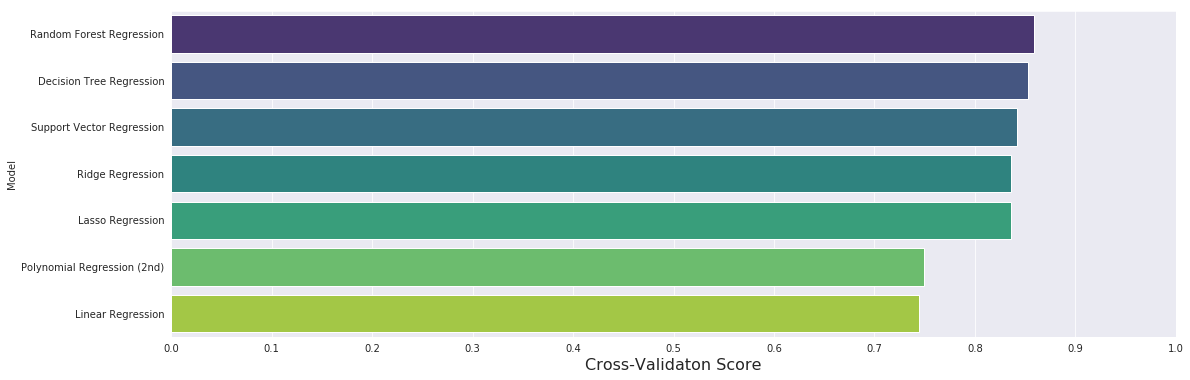

In [47]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe, palette='viridis')
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

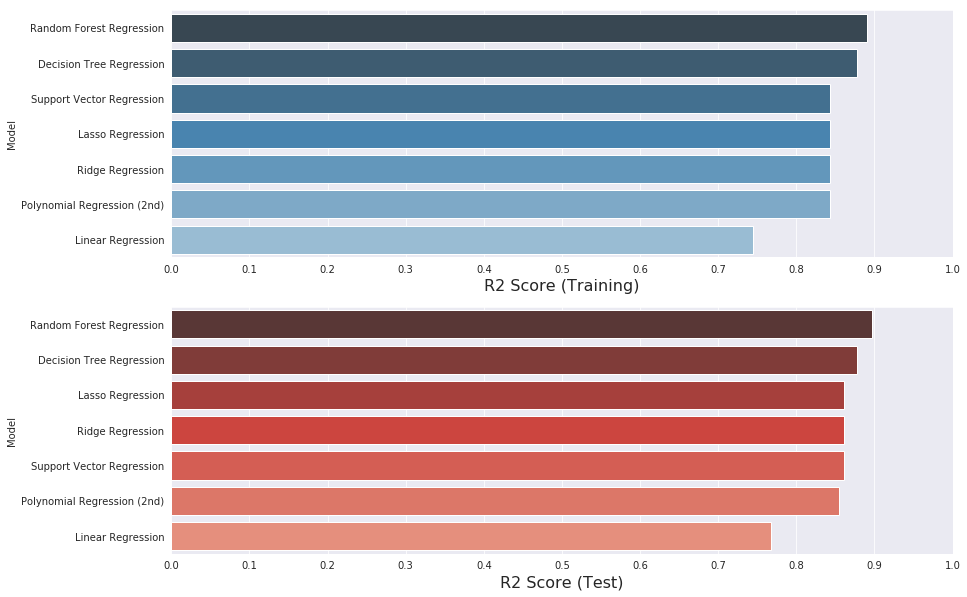

In [48]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

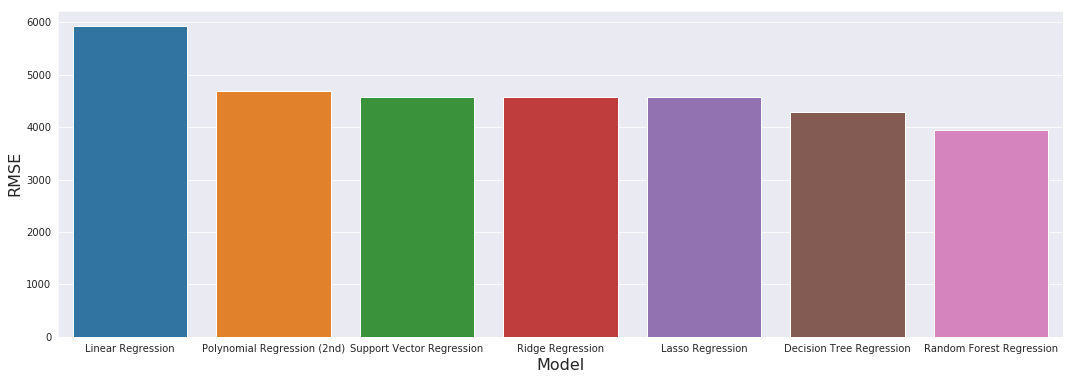

In [49]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()